Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Exercise 10.1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height?

Like the NSFG, the BRFSS oversamples some groups and provides a sampling weight for each respondent. In the BRFSS data, the variable name for these weights is totalwt. Use resampling, with and without weights, to estimate the mean height of respondents in the BRFSS, the standard error of the mean, and a 90% confidence interval. How much does correct weighting affect the estimates?

Read the BRFSS data and extract heights and log weights.

In [1]:
import brfss
import numpy as np

%matplotlib inline

/home/pruvolo/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = brfss.ReadBrfss(nrows=None)
df = df.dropna(subset=['htm3', 'wtkg2'])
heights, weights = df.htm3, df.wtkg2
weights = np.log10(weights)

Estimate intercept and slope.

In [10]:
import thinkstats2
inter, slope = thinkstats2.LeastSquares(heights, weights)
inter, slope

res = (heights*slope + inter - weights)

Make a scatter plot of the data and show the fitted line.

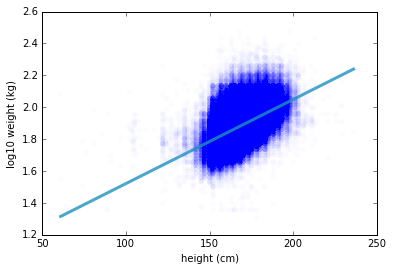

In [11]:
import thinkplot
thinkplot.Scatter(heights, weights, alpha=0.01)
fxs, fys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Plot(fxs, fys)
thinkplot.Config(xlabel='height (cm)', ylabel='log10 weight (kg)', legend=False)

Make the same plot but apply the inverse transform to show weights on a linear (not log) scale.

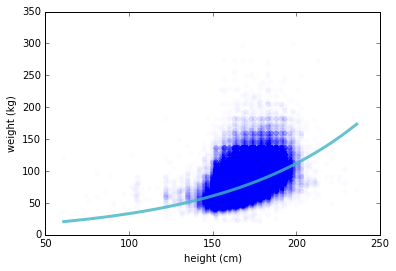

In [12]:
thinkplot.Scatter(heights, 10**weights, alpha=0.01)
fxs, fys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Plot(fxs, 10**fys)
thinkplot.Config(xlabel='height (cm)', ylabel='weight (kg)', legend=False)

Plot percentiles of the residuals.

The lines are flat over most of the range, indicating that the relationship is linear.

The lines are mostly parallel, indicating that the variance of the residuals is the same over the range.

Compute correlation.

In [13]:
rho = thinkstats2.Corr(heights, weights)
rho

0.53172826059826939

Compute coefficient of determination.

In [14]:
r2 = thinkstats2.CoefDetermination(weights, res)
r2

0.28273494311893921

Confirm that $R^2 = \rho^2$.

In [15]:
rho**2 - r2

-7.8104189782379763e-14

Compute Std(ys), which is the RMSE of predictions that don't use height.

In [ ]:
std_ys = thinkstats2.Std(weights)
std_ys

Compute Std(res), the RMSE of predictions that do use height.

In [ ]:
std_res = thinkstats2.Std(res)
std_res

How much does height information reduce RMSE?  About 15%.

In [ ]:
1 - std_res / std_ys

One might argue that no one talks about the log of their weight, so maybe we should calculate the coefficient of determination for the weights itself.

In [20]:
res_orig_weights = 10**(slope*heights + inter) - 10**weights

In [21]:
thinkstats2.CoefDetermination(10**weights, res_orig_weights)

0.26277407579222789

In terms of presenting the parameters in a sensible way, I would talk about how much each cm of weight contributes to the increase in someone's weight.

In [24]:
print "Percent increase per cm", 100*(10**slope-1)
print "Percent increase per 3 inches", 100*(10**(slope*2.54*3) - 1)

Percent increase per cm 1.22352432332
Percent increase per 3 inches 9.70961241437
